# Assignment1 Part A Cleaning and EDA

### This dataset includes a hourly/daily summary for Szeged, Hungary area, between 2006 to 2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy
import datetime
from pylab import rcParams

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 96453 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

#### Change some variables like `Summary`, `Precip Type`, `Daily Summary` to categorical variables:

In [5]:
df['Summary'] = df['Summary'].astype('category')
df['Precip Type'] = df['Precip Type'].astype('category')
df['Daily Summary'] = df['Daily Summary'].astype('category')

#### Some are Quantitative variables:

In [6]:
quantitative = df.select_dtypes(include = ["float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


#### Date Format Transformation:

In [7]:
df['Date'] = pd.to_datetime(df['Formatted Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

#### Find missing or inappropraite values of quantitative variables:

In [8]:
df[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a10e9ca58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a116ec9b0>]], dtype=object)

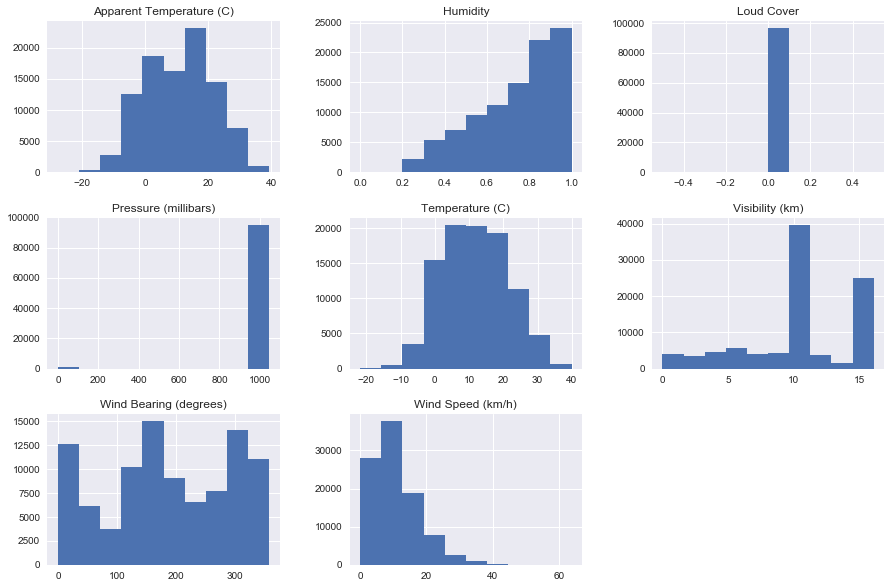

In [9]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
df[quantitative].hist()

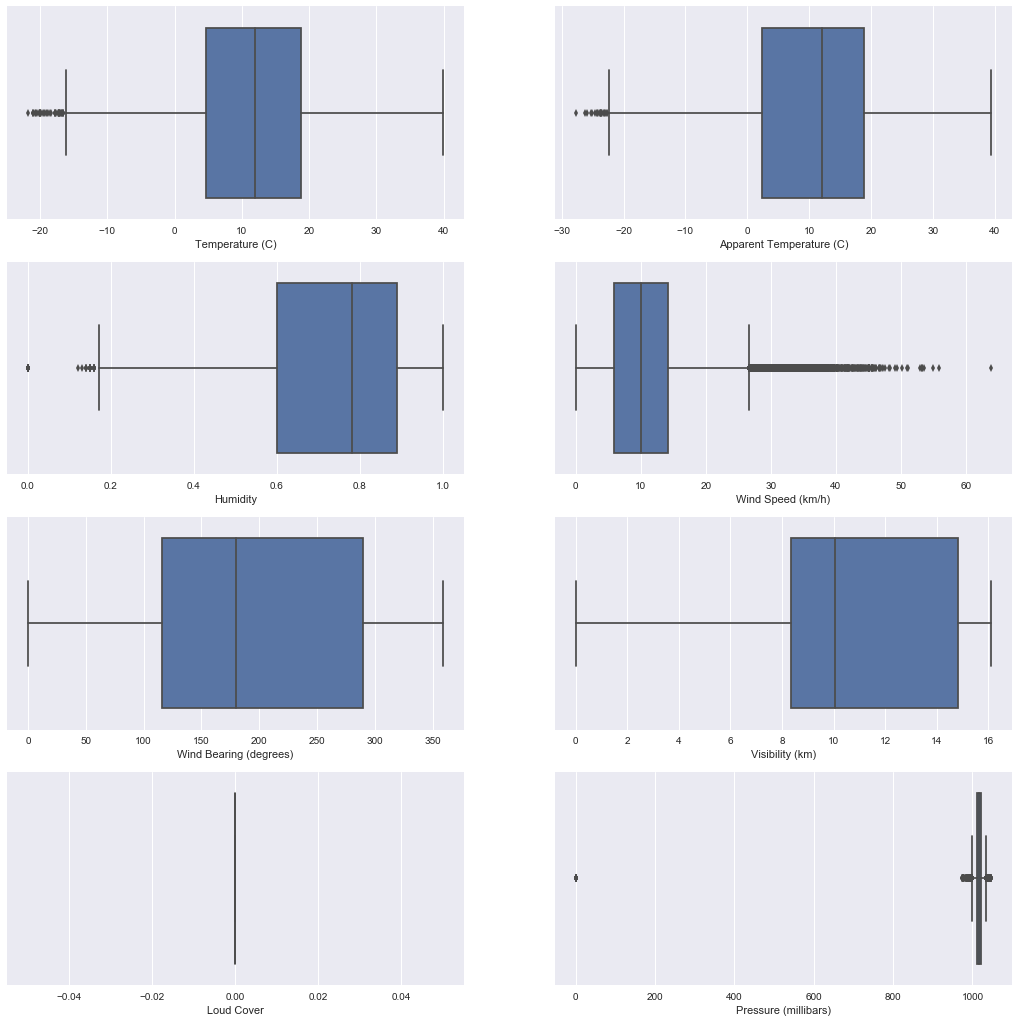

In [10]:
f, axes = plt.subplots(4, 2, figsize=(18, 18))
for i, column in enumerate(quantitative):
    sns.boxplot(df[column], ax=axes[i//2][i%2])

#### Loud Cover are zero, so we need to drop it. And some values of Pressure are zero, which may be the missing values, so we fill these with the median.

In [11]:
df=df.drop('Loud Cover',axis=1)

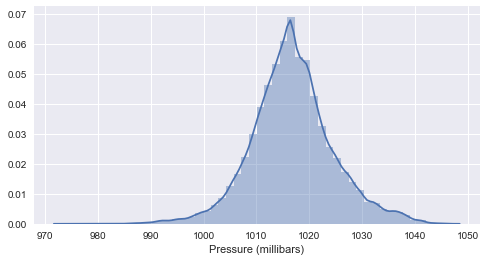

In [12]:
pressure_median = df['Pressure (millibars)'].median()
      
def pressure(x):
    return x or pressure_median
        
df["Pressure (millibars)"] = df.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 8, 4
sns.distplot(df['Pressure (millibars)'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 14 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null category
Precip Type                 96453 non-null category
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null category
Date                        96453 non-null datetime64[ns]
year                        96453 non-null int64
month                       96453 non-null int64
dtypes: category(3), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 8.5+ MB


In [14]:
quantitative = df.select_dtypes(include = ["float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')


#### Plot distribution of each colunmn:

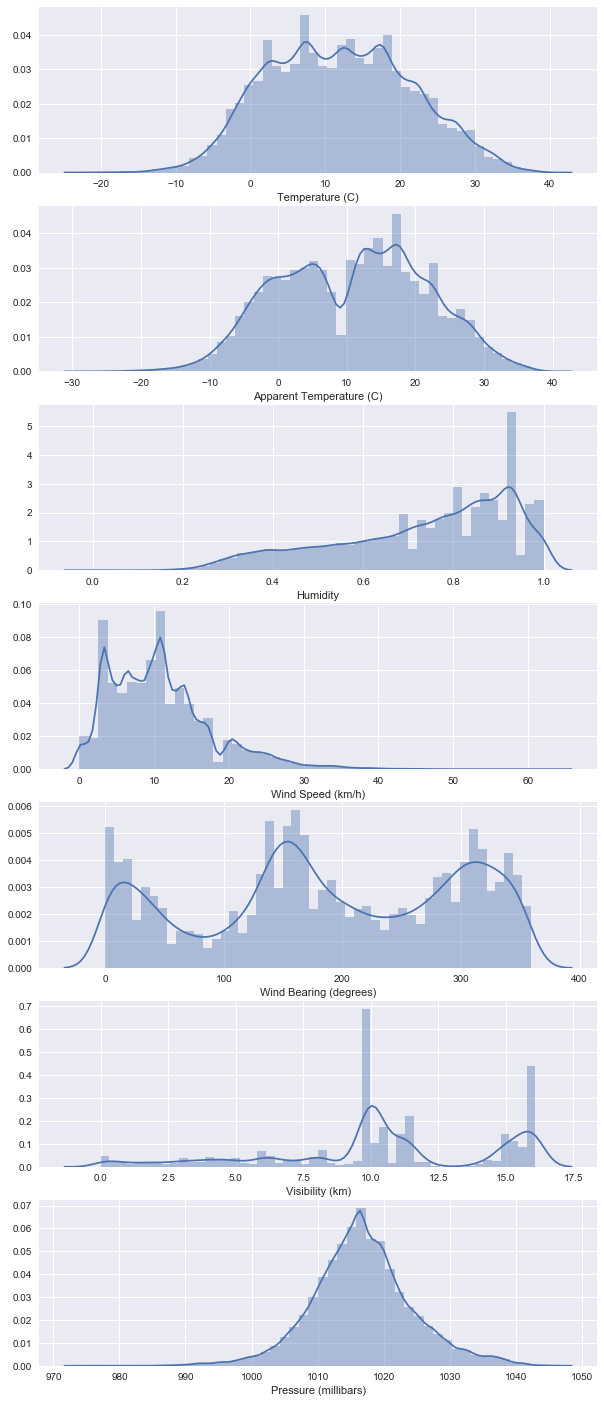

In [15]:
f, axes = plt.subplots(len(quantitative), figsize=(10, 25))
for i, column in enumerate(quantitative):
    sns.distplot(df[column], ax=axes[i])

In [16]:
from scipy.stats import kstest
for i, column in enumerate(quantitative):
    print(kstest(df[column], 'norm'), column)

KstestResult(statistic=0.81876514553952928, pvalue=0.0) Temperature (C)
KstestResult(statistic=0.74001815160731677, pvalue=0.0) Apparent Temperature (C)
KstestResult(statistic=0.5990171816042561, pvalue=0.0) Humidity
KstestResult(statistic=0.94450457662311149, pvalue=0.0) Wind Speed (km/h)
KstestResult(statistic=0.96792010912211313, pvalue=0.0) Wind Bearing (degrees)
KstestResult(statistic=0.93609417492410285, pvalue=0.0) Visibility (km)
KstestResult(statistic=1.0, pvalue=0.0) Pressure (millibars)


According to KStest that P < 0.05, they are not normal distributions, and according to these histograms, these variables' distributions are skewed.

#### Summary statistics for each column:

In [17]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1016.809278,2011.00029,6.523001
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,7.726359,3.16216,3.448501
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,973.780000,2005.00000,1.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1012.200000,2008.00000,4.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,2011.00000,7.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,2014.00000,10.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,2016.00000,12.000000


#### Plot catagorical data `Summary`:

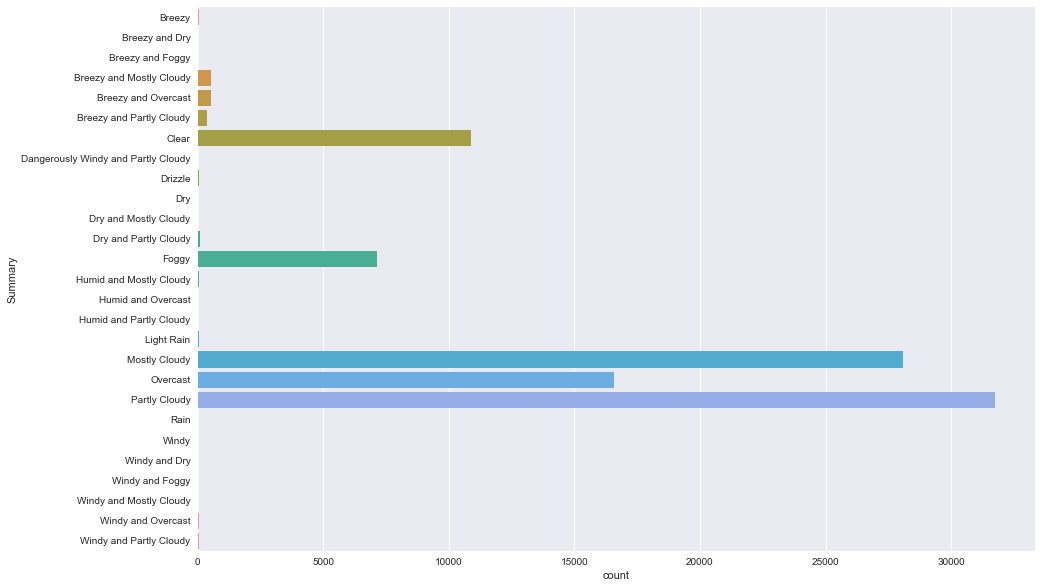

In [18]:
rcParams['figure.figsize'] = 15, 10
sns.countplot(y=df['Summary'])

In [19]:
summary_freq=pd.crosstab(index=df['Summary'],columns="count")  
summary_freq_rel = summary_freq/summary_freq.sum() 
summary_freq_rel.sort_values('count', ascending=False)

col_0,count
Summary,
Partly Cloudy,0.329000
Mostly Cloudy,0.291271
Overcast,0.172073
Clear,0.112905
Foggy,0.074109
Breezy and Overcast,0.005474
Breezy and Mostly Cloudy,0.005350
Breezy and Partly Cloudy,0.004002
Dry and Partly Cloudy,0.000892


#### According to these counts, most common weather type in Szeged are Partly Cloudy 32.9%, Mostly Cloudy 29.1%, Overcast 17.2%, Clear 11.3%, Foggy 7.4% and these are 97% out of the total.


#### Draw quantitative data's Time Series plots:

In [20]:
df = df.sort_values('Date')

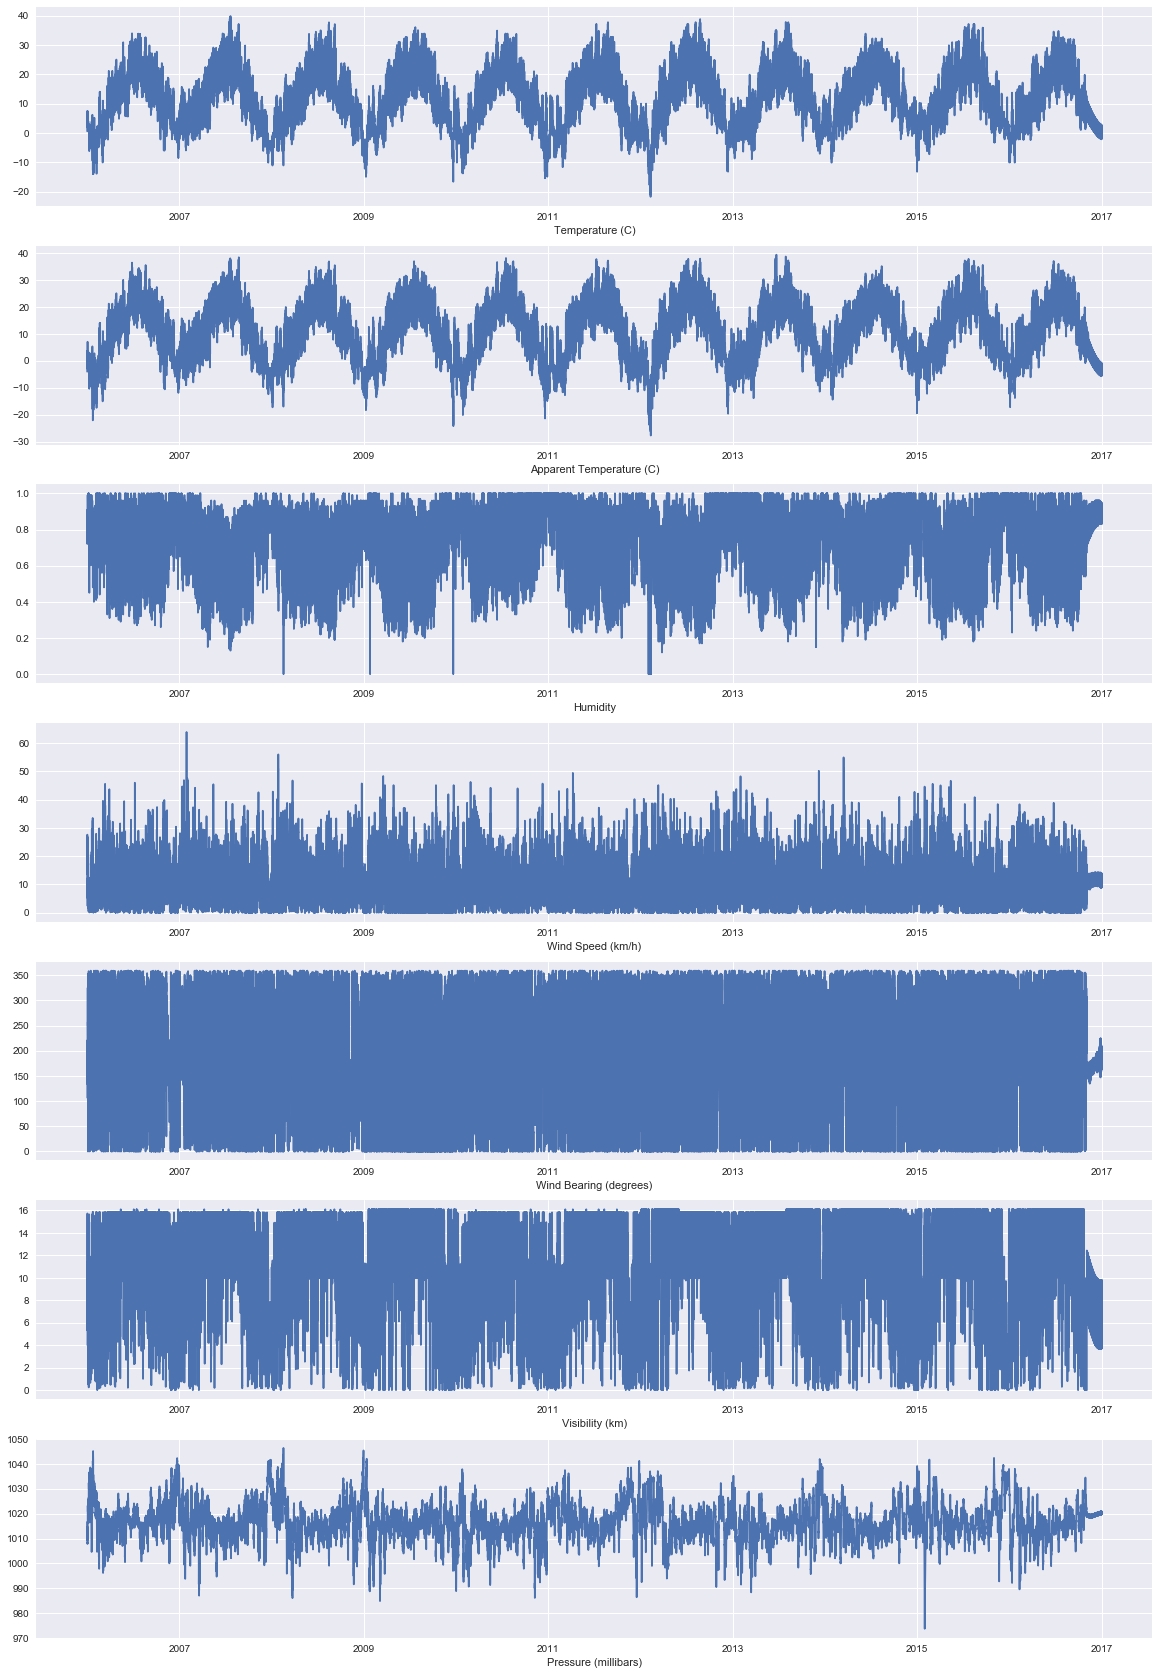

In [21]:
fig, axes = plt.subplots(len(quantitative),figsize=(20, 30) )
for i, column in enumerate(quantitative):
    axes[i].plot(df['Date'], df[column])
    axes[i].set_xlabel(column)

#### Summary: The weather in Szeged is always cloudy and the temperature, humidity, wind and other variables above vary according to seasons and are periodic. Temperature is high and humidity is low in every summer, and wind speed is also a little slow in summer, and visibility is high. That shows the city Szeged has distinct four seasons, hot in summer and cold in winter.


#### Correlation of columns:

#### Draw pairplot of data and use month as due variable:

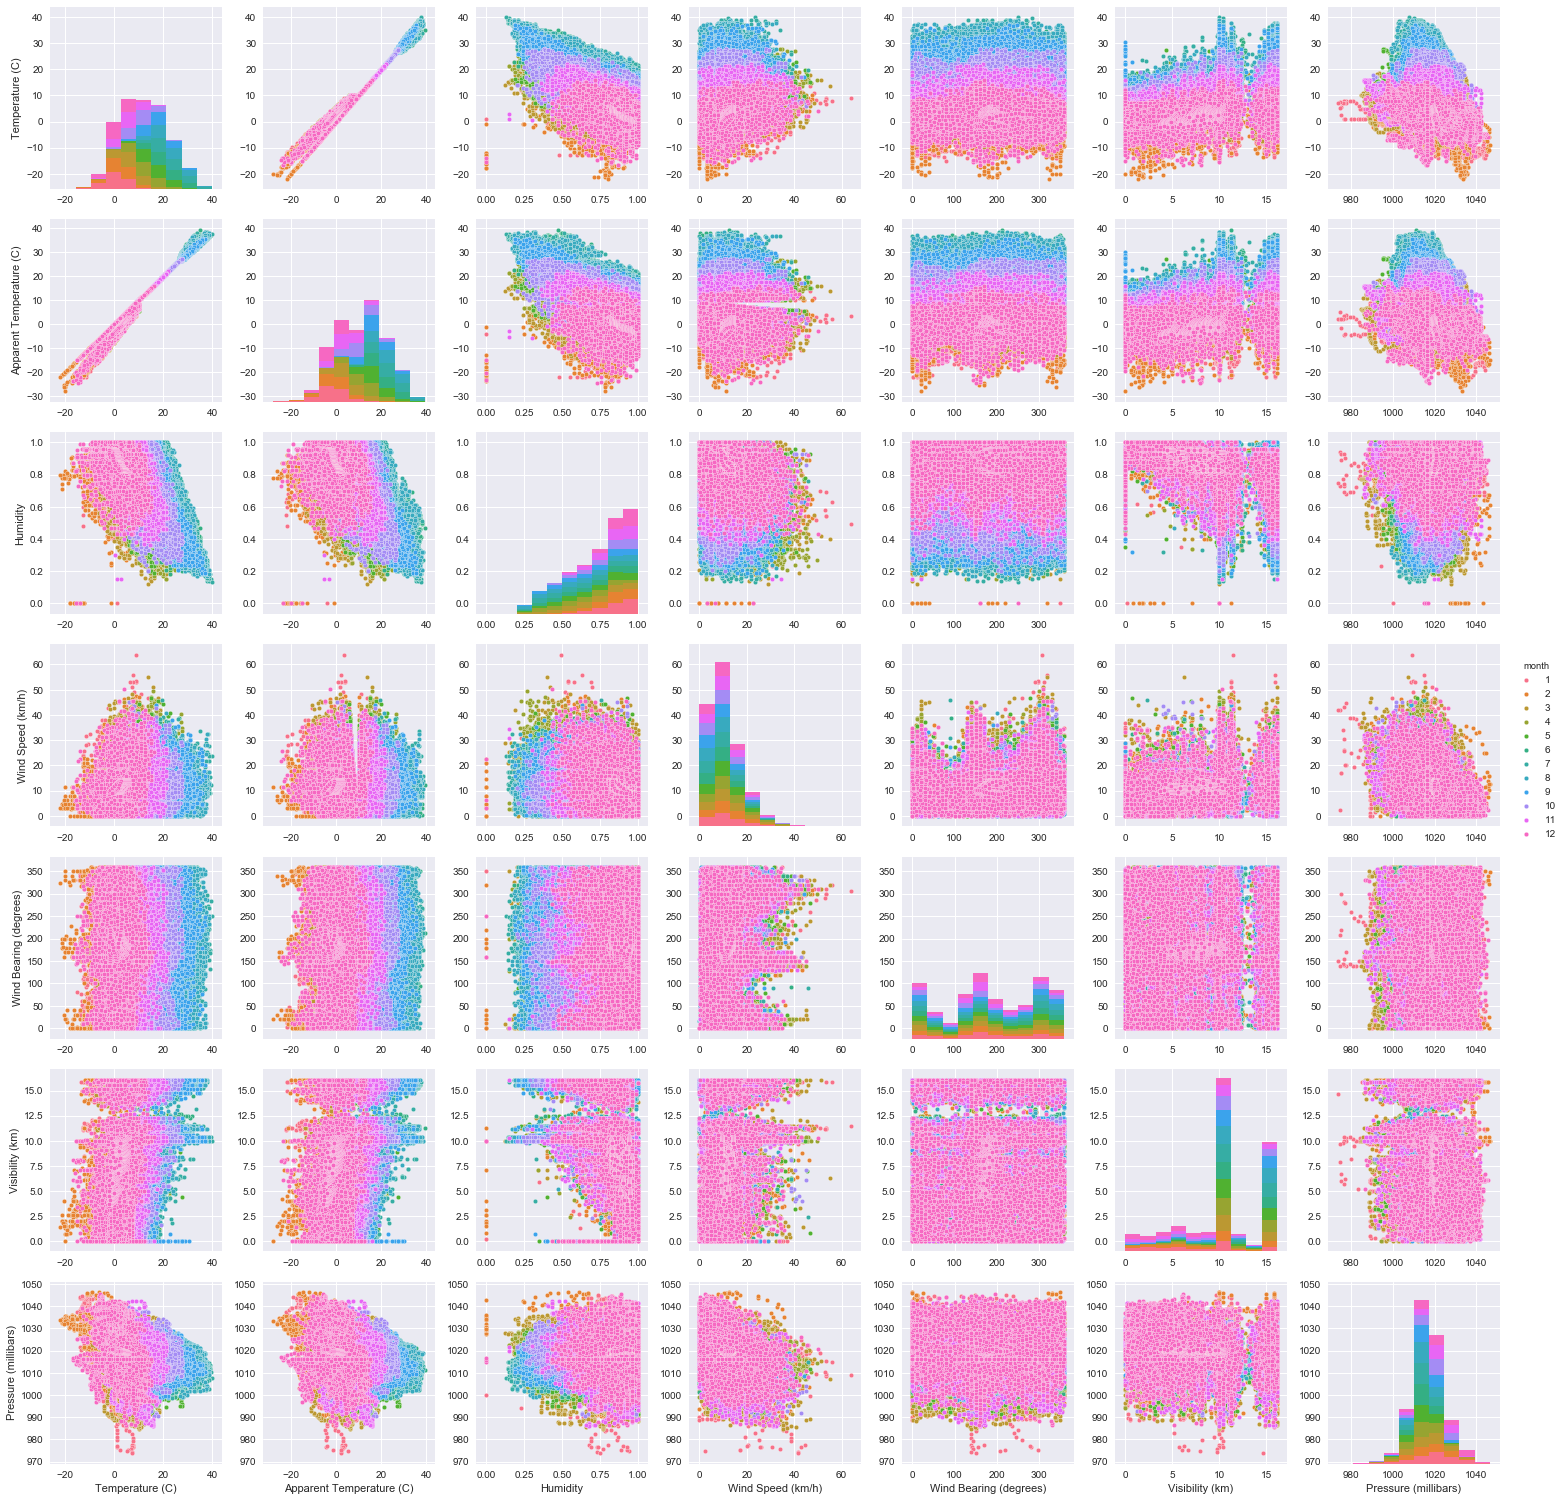

In [22]:
sns.pairplot(df, hue ='month', vars = quantitative, size = 3, plot_kws={'s': 20})

#### Calculate correlation between every two columns:

In [23]:
correlations = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']].corr()
print(correlations)

                          Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992629 -0.632255   
Apparent Temperature (C)         0.992629                  1.000000 -0.602571   
Humidity                        -0.632255                 -0.602571  1.000000   
Wind Speed (km/h)                0.008957                 -0.056650 -0.224951   
Wind Bearing (degrees)           0.029988                  0.029031  0.000735   
Visibility (km)                  0.392847                  0.381718 -0.369173   
Pressure (millibars)            -0.308120                 -0.286078  0.039032   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008957                0.029988   
Apparent Temperature (C)          -0.056650                0.029031   
Humidity                          -0.224951                0.000735   
Wind Speed (km/h)                  1.000000                0.103822

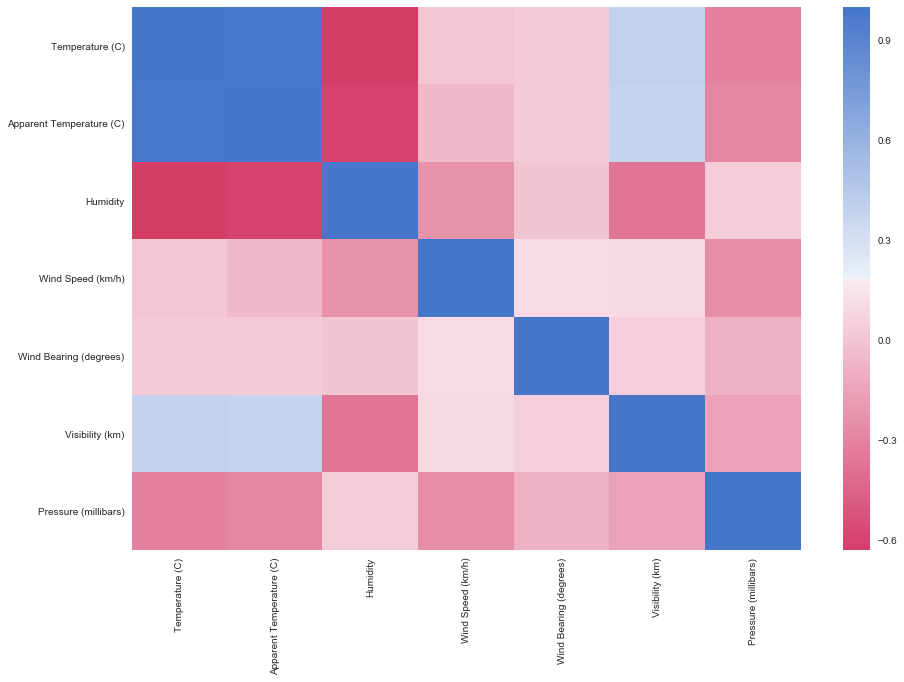

In [24]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
sns.heatmap(correlations, cmap=cmap)

#### Correlation between columns:
Temperature and Apparent Temperature have strong positive linear relationship.<br>
Humidity has strong negative linear relationship with Temperature and Apparent Temperature.<br>
Visibility has weak positive linear relationship with Temperature and Apparent Temperature, and has weak negative linear relationship with Humidity.<br>
Pressure has weak positive linear relationship with Temperature.<br>